# Módulo 4: Procesamiento de datos con Python

**Validación Cruzada**
>La validación cruzada es un mecanismo que hace que todos los datos “roten” entre entrenamiento y prueba, de tal manera que no existan casos de “Cherry Picking”

**Falacia de Cherry Picking**
>Una falacia de Cherry Picking ocurre cuando previamente seleccionas datos con la finalidad de probar un punto, mientras que ignoras o retiras aquellos datos que contradicen el punto que quieres defender. Un ejemplo de Cherry Picking ocurre con el movimiento anti-vacunas: se seleccionan solamente aquellos casos que consideran peligrosos, pero ignoran todos los casos que no lo son.

In [1]:
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
df = pd.read_csv('../DS/productos-verano-calificación-rendimiento_2020-08.csv')
data =df['clasificacion'].to_numpy()
data


array([3.76, 3.45, 3.57, ..., 3.71, 2.5 , 4.07])

In [2]:
K = 4
# random_seed = 48
# aleatorio = True

kfold = KFold(K)
ciclo = 1
for indices_train, indices_test in kfold.split(data):
    print("Ciclo: "+str(ciclo))
    print("\t datos para entrenamiento:"+str(data[indices_train]))
    print("\t datos para prueba:"+str(data[indices_test]))
    ciclo+=1

Ciclo: 1
	 datos para entrenamiento:[3.8  3.3  4.33 ... 3.71 2.5  4.07]
	 datos para prueba:[3.76 3.45 3.57 4.03 3.1  5.   3.84 3.76 3.47 3.6  3.46 3.31 3.45 3.32
 3.65 3.92 3.72 3.83 3.82 3.67 3.84 3.6  3.38 3.67 3.75 4.15 4.03 4.29
 4.25 4.06 4.06 4.37 3.81 3.44 3.8  4.16 2.75 4.06 3.83 4.16 4.26 1.5
 3.79 3.53 3.82 3.28 3.   4.03 3.18 3.8  3.43 4.19 3.8  3.38 4.03 3.5
 3.56 4.06 4.   4.13 4.   5.   3.1  3.91 3.72 2.71 3.81 3.47 3.93 3.41
 3.74 3.93 3.82 3.46 5.   4.5  4.26 4.24 3.56 4.22 3.42 4.   3.64 3.08
 4.41 3.7  3.81 4.   3.94 4.07 4.29 3.46 4.1  3.7  3.77 3.57 4.54 3.64
 3.32 4.11 3.18 3.96 2.8  3.89 3.97 3.61 3.82 3.96 4.2  3.77 2.61 3.93
 5.   4.3  4.12 3.67 4.5  4.   4.16 3.71 4.75 5.   3.   4.11 3.59 3.61
 5.   3.99 4.03 5.   3.73 3.99 4.38 3.08 4.11 3.6  3.78 4.05 3.53 4.6
 3.72 4.16 4.04 3.6  3.89 3.49 3.07 3.11 4.07 3.96 4.   3.97 3.19 3.67
 2.5  3.82 2.92 3.75 4.16 4.29 3.68 3.63 3.   3.06 3.76 3.81 2.67 3.76
 3.46 3.29 2.   4.14 3.28 3.89 3.14 3.98 4.04 3.76 4.16 3.0

>Se realizaron 4 ciclos con donde cada cliclo tiene parte de prueba y entrenamiento 
>shuffle pone en aleatorios los valores

**K-means**
>A diferencia de K-nearest-neighbors, k-means (también llamado K-medias) es muchisimo mas eficiente computacionalmente, y te da resultados igual de buenos que K-nearest-neighbors, por lo cual trabajaremos sobre este algoritmo.


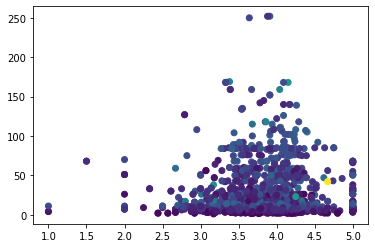

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

x =df['clasificacion'].to_numpy()
x2 =df['precio_al_por_menor'].to_numpy()
y =df['precio'].to_numpy()

plt.scatter(x, x2, c=y)
plt.show()

In [25]:
K = 4
#Dividimos entre train y test.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
#Entrenamos con x_train...
modelo_kmeans = KMeans(n_clusters = K).fit(x_train)
#Y extraemos los centroides.
centroides = modelo_kmeans.cluster_centers_
print(centroides)

ValueError: Expected 2D array, got 1D array instead:
array=[4.   3.47 4.06 4.   4.28 3.55 4.07 3.8  3.78 4.31 3.58 3.62 3.15 2.71
 3.47 4.14 4.11 3.95 3.53 5.   4.31 3.88 4.03 3.74 3.8  4.25 4.24 4.07
 3.93 4.03 3.51 3.64 3.96 3.59 4.28 4.07 3.65 3.77 3.67 4.15 3.7  3.77
 3.85 3.96 3.89 4.24 4.   3.4  2.86 4.47 3.   3.4  3.77 3.87 4.16 3.29
 3.98 3.66 3.11 3.8  3.   4.29 3.62 3.91 3.   4.17 5.   3.8  4.33 4.
 3.39 3.57 4.04 3.4  3.92 3.18 5.   3.32 3.79 4.19 3.83 3.68 3.78 3.34
 2.79 4.22 3.1  3.32 4.05 3.35 4.17 3.03 3.57 3.5  3.39 3.91 4.23 4.01
 3.73 4.48 3.55 3.38 3.67 4.03 4.47 3.41 3.09 3.74 3.91 4.21 3.84 3.76
 3.72 4.13 4.22 4.4  3.26 3.61 4.   3.39 5.   3.77 3.27 4.14 3.8  4.
 3.89 3.98 3.15 3.38 3.41 3.18 3.42 4.39 4.22 4.09 4.   3.28 2.98 3.6
 4.25 4.38 3.79 4.22 3.69 4.05 3.64 4.06 4.15 3.73 3.8  4.23 4.37 3.53
 3.84 3.64 3.48 4.22 3.93 3.68 4.22 4.52 3.9  3.69 4.05 2.57 3.39 2.92
 4.31 2.97 3.94 3.84 3.85 4.35 2.75 3.63 5.   3.96 2.99 3.99 3.91 3.74
 4.17 3.71 5.   5.   3.92 3.71 4.11 3.91 3.61 3.83 3.77 3.8  3.5  2.
 3.8  3.74 3.75 3.82 3.75 3.4  3.31 3.94 4.07 3.68 3.09 4.44 4.75 3.32
 3.79 5.   3.78 3.88 3.63 4.67 3.47 3.7  4.15 4.16 3.34 4.05 3.6  3.61
 4.08 4.07 4.   1.   3.88 3.93 2.8  4.23 5.   4.02 3.74 3.61 2.75 5.
 3.33 4.02 4.14 4.18 3.91 4.05 3.93 3.83 4.57 3.31 3.   4.   4.5  4.28
 3.64 3.7  3.54 4.19 3.67 3.75 4.13 3.38 3.1  3.43 3.93 4.3  3.65 3.19
 3.71 3.22 2.81 3.46 4.1  5.   3.67 4.08 3.67 3.97 4.16 3.18 3.76 3.18
 3.96 3.39 3.36 3.6  4.01 4.19 3.67 3.68 3.09 3.75 3.7  5.   4.17 3.77
 3.72 3.45 3.33 4.16 3.74 4.34 3.63 3.88 5.   2.75 3.41 4.29 4.5  2.81
 4.26 4.53 3.49 4.23 3.1  3.81 3.8  3.79 4.   5.   3.14 3.93 3.69 3.91
 3.96 2.5  4.05 5.   3.61 3.61 3.16 4.11 5.   3.6  3.8  3.12 3.18 3.64
 4.5  3.16 3.73 4.11 4.41 3.95 3.65 3.32 3.86 4.05 4.21 4.08 3.64 3.64
 4.36 4.13 3.61 4.38 4.   4.22 4.19 4.16 3.99 3.54 3.94 3.45 3.47 3.36
 4.02 3.69 3.5  4.13 3.99 4.04 3.97 2.   4.37 3.37 3.14 2.67 3.47 4.18
 2.75 4.4  3.87 4.27 3.7  4.14 4.17 3.85 4.24 3.49 4.83 3.07 4.05 3.66
 4.16 3.2  3.82 4.23 4.   4.1  3.96 4.06 4.23 4.5  4.28 3.93 3.32 3.67
 3.28 2.44 3.43 3.98 3.5  3.91 2.88 3.94 3.72 3.79 4.43 5.   3.47 4.26
 5.   3.8  5.   4.14 3.43 3.97 3.6  3.5  4.16 3.5  4.36 4.   3.2  3.4
 3.93 5.   4.   3.85 4.19 4.2  5.   4.19 4.23 3.67 4.41 3.   3.41 3.71
 4.14 3.54 3.97 3.6  4.01 3.73 3.95 3.88 4.8  3.71 4.14 5.   3.72 4.21
 3.66 2.9  4.02 4.06 3.56 3.71 3.38 3.06 4.06 3.18 5.   4.16 5.   4.23
 3.53 4.39 3.67 3.73 3.39 3.63 3.46 3.83 3.31 3.7  3.82 3.93 3.64 3.62
 4.04 3.61 5.   5.   3.49 3.08 3.71 3.91 2.9  5.   3.81 4.   3.34 3.73
 3.67 3.44 3.58 3.82 3.51 4.25 3.67 2.33 3.57 3.56 4.3  3.46 3.41 3.67
 4.26 5.   3.83 3.93 4.08 3.29 4.26 3.81 3.96 3.51 3.98 3.13 2.67 4.04
 3.37 5.   4.6  4.17 3.87 3.65 5.   4.3  3.86 3.75 4.24 3.21 3.92 4.05
 4.   3.93 2.95 3.75 4.34 4.5  4.07 3.93 2.67 4.   4.13 4.36 3.6  4.29
 3.52 3.47 4.5  3.59 3.17 3.75 3.98 5.   3.76 3.81 4.14 3.68 4.07 4.07
 3.74 4.2  3.81 4.19 3.79 3.91 4.15 3.52 4.34 3.82 3.6  4.86 4.29 4.31
 3.35 3.87 4.14 3.89 3.78 3.91 3.89 3.65 3.32 3.9  4.07 3.61 3.49 3.42
 4.63 3.98 3.59 4.06 4.17 4.25 3.34 3.57 4.   2.82 4.34 3.73 3.67 5.
 3.58 3.9  3.98 3.67 4.   4.13 4.1  4.3  3.78 2.25 4.25 3.98 3.45 3.33
 4.28 3.92 3.7  3.46 3.07 3.82 3.73 4.36 3.74 4.05 4.03 3.76 3.8  4.14
 3.56 4.02 3.78 2.98 4.09 3.04 4.33 2.   4.09 4.19 4.28 4.25 3.   4.06
 4.1  4.67 2.92 4.01 4.17 3.93 4.27 3.76 3.75 3.87 3.5  3.52 4.12 3.68
 3.82 4.   3.59 4.14 3.51 3.67 4.14 3.66 3.71 5.   3.73 5.   4.18 3.64
 3.69 3.9  3.76 3.28 4.   3.84 3.83 4.15 3.54 5.   3.39 3.88 4.1  4.02
 3.16 3.28 3.24 3.76 3.78 3.98 4.   3.75 4.4  4.24 3.17 3.93 3.84 3.8
 4.11 4.39 4.1  4.04 2.   4.04 3.98 3.56 2.71 4.26 3.95 3.76 3.08 3.58
 4.64 4.54 3.36 4.07 3.54 4.18 3.08 4.06 4.04 2.92 4.14 3.83 4.   4.09
 3.67 3.92 3.   3.25 3.28 3.22 4.   5.   4.01 3.44 3.93 3.96 2.67 3.82
 2.9  3.76 3.86 4.1  4.18 3.77 4.24 1.5  3.47 4.29 3.6  4.41 3.73 4.34
 3.5  3.85 3.73 4.12 2.5  3.78 4.5  4.02 4.14 3.82 3.94 4.3  5.   4.06
 3.52 3.59 4.16 3.86 3.01 4.11 3.65 3.94 3.97 3.3  3.74 4.36 3.69 4.02
 3.76 3.67 3.51 4.23 4.75 4.33 4.03 4.08 3.47 3.88 3.96 3.4  4.15 3.98
 4.18 5.   3.47 3.82 4.04 4.1  4.39 4.12 4.05 4.27 3.63 4.   4.22 5.
 3.9  4.15 2.77 4.09 4.25 3.53 3.86 3.99 3.66 4.06 3.87 4.15 4.05 3.88
 3.61 3.29 3.41 3.51 4.14 3.67 3.8  4.   3.36 3.16 3.6  3.81 4.   3.06
 4.09 3.81 4.07 3.83 3.25 4.07 4.07 3.2  5.   4.24 5.   3.83 4.29 3.66
 3.45 3.31 4.36 3.5  3.95 5.   3.29 2.86 4.23 2.9  4.07 3.91 3.47 3.83
 4.   3.91 4.58 3.99 3.07 3.65 4.16 3.75 4.2  3.55 3.93 3.87 3.87 4.09
 4.09 4.12 4.03 3.67 4.06 3.89 3.76 4.29 3.84 4.28 5.   3.48 3.84 3.69
 3.9  4.15 4.06 3.7  4.46 3.8  2.92 4.4  3.65 4.09 3.18 5.   4.03 3.87
 4.21 4.2  3.   4.18 3.63 4.41 3.13 3.84 4.04 4.47 3.73 4.23 4.07 4.32
 3.69 4.03 3.45 3.75 3.83].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [86]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [92]:
import requests
endpoint = 'http://localhost:3000/api/craigslists'
r = requests.get(endpoint)
#r.json().keys()
json = r.json()
result = json['craigslist']
#Convertir resultado obtenido en el API a Dataframe
normalized = pd.json_normalize(result)
df = pd.DataFrame.from_dict(normalized)
df.head()
df = df[df['condicion'].notna()]
df['condicion'].unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

**Transformar Datos**
>Ahora, vamos a tomar las columnas "cantidad de accion" y "cantidad de romance", y vamos a transformarlas en nuestras variables a clasificar por K-medias. Como aqui tengo acción y romance, hay que mappear "accion" a 0, y "romance" a 1, para hacer un dataset de entrenamiento y prueba.

In [94]:
x = df[['precio', 'anio']].to_numpy()
y = df['condicion'].map({
    'good':0,
    'excellent':1,
     'fair':0, 'like new':1, 'new':1, 'salvage':0,
}).to_numpy()


>Se inidica que el 60 % a train y 40 % para pruebas  `test_size=0.4` 

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

**Centroides.**
>Una vez mappeado, vamos a entrenar el algoritmo de K-medias de forma automática, y extraigamos los centroides obtenidos.

In [99]:
modelo_kmeans = KMeans(n_clusters = 2).fit(x_train)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[33285.85178507  2015.36747205]
 [ 9611.73168411  2008.46217888]]


## K-Means

>Data set de clientes de un centro comercial, se suscriben a una tarjeta de membresia, cuando compran se genera un puntaje a cada cliente que gasto mas.

** Importamos las librerías*

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Cargamos los datos con pandas**

In [113]:
dataset = pd.read_csv("./data/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [115]:
X = dataset.iloc[:, [3,4]].values
x

array([['33590', '2014'],
       ['22590', '2010'],
       ['39590', '2020'],
       ...,
       ['0', '2007'],
       ['0', '2012'],
       ['0', '2006']], dtype=object)

>Matriz que contiene el todas las filas, y solo contiene las filas que corresponden a los ingresos anuales y a la puntuacion

**Método del codo para averiguar el número óptimo de clusters**

In [177]:
from sklearn.cluster import KMeans
wcss = []
# Se hace un cliclo de 1 asta 11 se ejecuta 10 veces
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

>Método del codo para averiguar el número óptimo de clusters

>se hace en dos fases se crea un clusters por cada vuelta, se inicialisa utilizando `k-means++`
 con un numero  maximo de iter para que se salga, inicializacion aleatoria por defecto 10
>Se agustan la matriz de caracteristias `kmeans.fit(X)`, calcula los centros
>Calcula la suma de los cuadrados de las distancias al centro, anade al final la suma de los parametos 

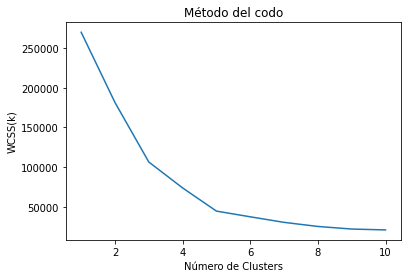

In [119]:
plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

>Grafico al proyectar la graifca se ve que el numero optimo es k=5, donde inicia la curva

**Aplicar el método de k-means para segmentar el data set**

In [120]:
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

>se raliza nuevamente sin el ciclo sabiendo el numero optimo que es 5

**Visualización de los clusters**

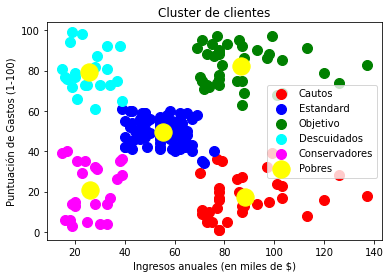

In [122]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "red", label = "Cautos")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "blue", label = "Estandard")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "green", label = "Objetivo")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "cyan", label = "Descuidados")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = "magenta", label = "Conservadores")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Pobres")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()

>La grafica se visualiza los que ganan mucho y gastan poco, o los que ganan poco y gastan mucho

## Regresión con Árboles de Decisión
>Cómo importar las librerías y cargar el data set

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./data/Position_Salaries.csv')
dataset.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [132]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [125]:

# Dividir el data set en conjunto de entrenamiento y conjunto de testing
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

# Escalado de variables
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

# Ajustar la regresión con el dataset
from sklearn.tree import DecisionTreeRegressor
regression = DecisionTreeRegressor(random_state = 0)
regression.fit(X, y)



DecisionTreeRegressor(random_state=0)

>Maximo numero de hojas indefinido, numero de muestras para partir 2

In [134]:
# Predicción de nuestros modelos
#y_pred = regression.predict(6.5)
y_pred = regression.predict([[6.5]])
y_pred

array([150000.])

>la prediccion es inferior a lo que se solicitaba de 65,000 solo se da 15,000

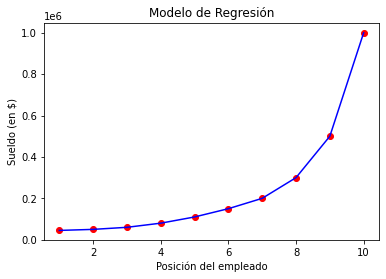

In [135]:
# Visualización de los resultados del Modelo Polinómico
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Modelo de Regresión")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

>se puede decir que los que estan en 3.5 y 2.5 cobran lo mismo que el 3 ya que esta en la media que es 3

## Naive Bayes
>Cómo importar las librerías y cargar el data set

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./data/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [153]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [154]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

>Se elige el 75 % para entrenar y el 25 % para testing

In [155]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

>y pred son las predicciones y se puede contrastar con y test

In [159]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

>Matriz de confusión un total de 10 usuarios mal clasificados, por parte de nuestro navi

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


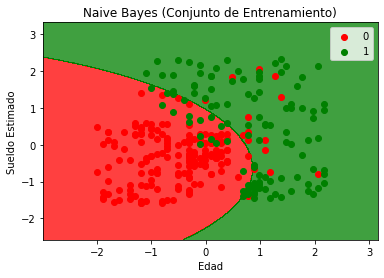

In [157]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

>Curva perfectamente definida lo de rojo son gente que no compro el producto, y los de verde son los que si compraron los puntos que estan fuera de su area son los q el modelo se equivoco
>Estos resultados son para el congunto de entrenamiento 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


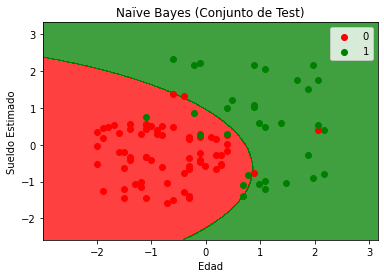

In [158]:

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naïve Bayes (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()


>la clasificacion es la misma, en este caso en el conjunto de testing se puede mostrar los 10 resultados que no estan correctos 7 verdes en zona roja y 3 es zona verde
>Estos resultados son para el congunto de testing

## SVM Support vector machine
>Cómo importar las librerías y cargar el data set

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set
dataset = pd.read_csv('./data/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [162]:

X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

>Se elige el 75 % para entrenar y el 25 % para testing

In [ ]:
# Ajustar el SVM en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)


>Se ejecuta el SVM 

In [166]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm 

array([[66,  2],
       [ 8, 24]], dtype=int64)

>validamos la matriz de conficion para verificar el numero de predicciones incorrectas en total son 10

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


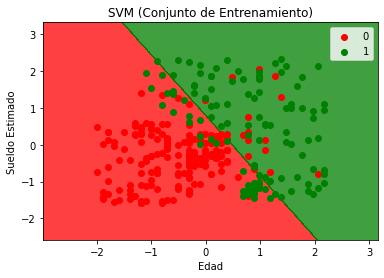

In [174]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()


>Grafica de conjunto de entrenamiento, separador lineal, en caso de tener valores que no se pueden separar caen en el lado de la grafica incorrecta.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


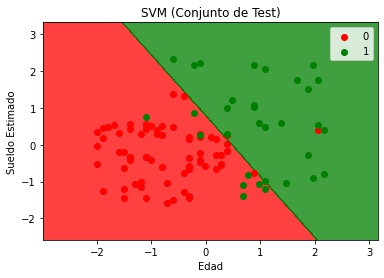

In [164]:

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()



>grafica sobre el conjunto de testing